In [44]:
import numpy as np
from lwpackage.lwdata import get_stock_price

In [45]:
data = get_stock_price(frequency='1m',
                start_time='20190101',
                end_time='20210101',
                from_database=True)

In [47]:
data['ret'] = data.groupby('instrument_id')['close'].transform(lambda x: x.pct_change())
data

,time,instrument_id,open,high,low,close,volume,ret
0,2019-12-05 09:31:00,600747,0.26,0.27,0.26,0.26,1690401,NaN
1,2019-12-05 09:32:00,600747,0.26,0.26,0.26,0.26,170100,0.000000
2,2019-12-05 09:33:00,600747,0.26,0.27,0.26,0.27,623300,0.038462
3,2019-12-05 09:34:00,600747,0.26,0.27,0.26,0.26,23800,-0.037037
4,2019-12-05 09:35:00,600747,0.26,0.27,0.26,0.26,330800,0.000000
...,...,...,...,...,...,...,...,...
5102,2020-09-15 14:56:00,300216,0.19,0.20,0.19,0.20,63526,0.052632
5103,2020-09-15 14:57:00,300216,0.20,0.21,0.19,0.19,86800,-0.050000
5104,2020-09-15 15:00:00,300216,0.19,0.19,0.19,0.19,590900,0.000000
16925,2020-11-09 15:00:00,300431,0.28,0.28,0.28,0.28,1786880,NaN


In [98]:
data1 = data.loc[data['instrument_id'] == '002509'].fillna(0).copy()
data1

,time,instrument_id,open,high,low,close,volume,ret
7075,2020-07-07 10:16:00,002509,0.19,0.19,0.18,0.18,126900,0.000000
7076,2020-07-07 10:17:00,002509,0.18,0.18,0.18,0.18,32900,0.000000
7077,2020-07-07 10:18:00,002509,0.18,0.18,0.18,0.18,35300,0.000000
7078,2020-07-07 10:19:00,002509,0.18,0.18,0.18,0.18,12600,0.000000
7079,2020-07-07 10:20:00,002509,0.18,0.18,0.18,0.18,12200,0.000000
...,...,...,...,...,...,...,...,...
9040,2020-07-17 14:54:00,002509,0.15,0.15,0.15,0.15,11257972,0.000000
9041,2020-07-17 14:55:00,002509,0.14,0.15,0.14,0.15,4442500,0.000000
9042,2020-07-17 14:56:00,002509,0.15,0.16,0.15,0.15,1885700,0.000000
9043,2020-07-17 14:57:00,002509,0.15,0.16,0.15,0.16,2977200,0.066667


## 单利

<Axes: >

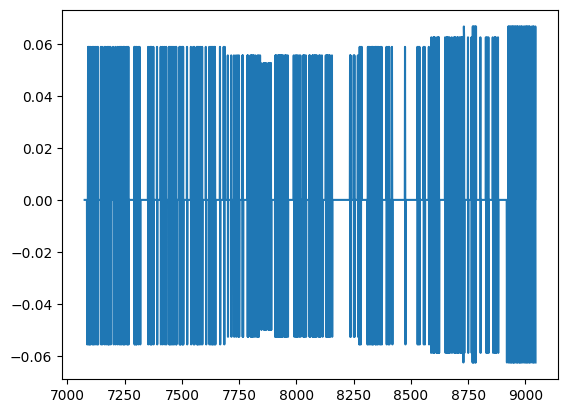

In [100]:
data1['ret'].plot()

In [72]:
# 整个时间区间内单利计算的收益率
data1['ret'].sum()

0.6626117991055903

In [73]:
# 整个时间区间内单利计算的年化收益率
data1['ret'].mean() * 4 * 60 * 252

20.35284997963743

## 复利

In [99]:
# 整个时间区间内复利计算的收益率
(data1['ret'] + 1).prod() - 1

-0.16666666666667074

In [92]:
# 整个时间区间内复利计算的年化收益率
cum_ret = (data1['ret'] + 1).cumprod()
(cum_ret.iloc[-1] / cum_ret.iloc[0]) ** int((252 * 4 * 60 / len(data1)))

0.004212720233086807

单利和复利计算，年化收益率差别还是很大的。所以，到底咋算呢？

In [101]:
# 胜率
len(data1.loc[data1['ret'] > 0]) / len(data1)

0.12791878172588833

从胜率看出，这个股票大于0的收益率的时间截面很少，所以一般算出来表现应该比较差才对。所以建议使用复利收益率

而且，我认为采取的计算方式和股票本身的价格也有关系：如果股票本身价格很高，就不容易出现较大的分钟频收益率数据；如果股票本身价格很低，就容易出现很大的甚至超过100%的分钟频收益率数据。

In [97]:
data1

,time,instrument_id,open,high,low,close,volume,ret
7075,2020-07-07 10:16:00,002509,0.19,0.19,0.18,0.18,126900,0.000000
7076,2020-07-07 10:17:00,002509,0.18,0.18,0.18,0.18,32900,0.000000
7077,2020-07-07 10:18:00,002509,0.18,0.18,0.18,0.18,35300,0.000000
7078,2020-07-07 10:19:00,002509,0.18,0.18,0.18,0.18,12600,0.000000
7079,2020-07-07 10:20:00,002509,0.18,0.18,0.18,0.18,12200,0.000000
...,...,...,...,...,...,...,...,...
9040,2020-07-17 14:54:00,002509,0.15,0.15,0.15,0.15,11257972,0.000000
9041,2020-07-17 14:55:00,002509,0.14,0.15,0.14,0.15,4442500,0.000000
9042,2020-07-17 14:56:00,002509,0.15,0.16,0.15,0.15,1885700,0.000000
9043,2020-07-17 14:57:00,002509,0.15,0.16,0.15,0.16,2977200,0.066667


In [43]:
# 收益率平均按照年化10%计算
# 生成一列随机数，代表一年内的分钟频率收益率序列
ret_min = np.random.uniform(0, 1, 100)
ret_min

0.49361133870316715

In [12]:
ret_min

array([0.83987101, 0.00855818, 0.12596678, 0.79139499, 0.77511673,
       0.63056422, 0.1865663 , 0.60380636, 0.01257613, 0.39190333,
       0.09662536, 0.56933204, 0.79183219, 0.24541147, 0.67493415,
       0.01807613, 0.48139499, 0.80868593, 0.59970467, 0.6845612 ,
       0.24490179, 0.21754866, 0.08214964, 0.31792024, 0.49672592,
       0.87149834, 0.28523248, 0.25932262, 0.98340711, 0.68463726,
       0.35654246, 0.47900416, 0.20803741, 0.88756198, 0.3115285 ,
       0.40751455, 0.21536112, 0.80246623, 0.82314135, 0.32720983,
       0.85033713, 0.22446929, 0.22625491, 0.23977427, 0.16694997,
       0.92316527, 0.03204837, 0.86200176, 0.81107338, 0.51076136,
       0.6849264 , 0.08695985, 0.06596985, 0.45955778, 0.75808796,
       0.95648838, 0.43804183, 0.30281118, 0.10681298, 0.07594969,
       0.66692265, 0.55733348, 0.99462595, 0.25923312, 0.39783426,
       0.17660617, 0.94880641, 0.82622754, 0.17387448, 0.44954379,
       0.39211478, 0.5790725 , 0.38605053, 0.89432424, 0.26705